In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import datasets
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

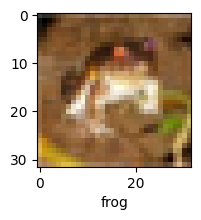

In [8]:
plot_sample(X_train, y_train, 0)

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
# This is a normal artificial neural network (ANN)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 243s 154ms/step - loss: 1.8970 - accuracy: 0.3251
Epoch 2/5
1563/1563 [==============================] - 255s 163ms/step - loss: 1.6685 - accuracy: 0.3992
Epoch 3/5
1563/1563 [==============================] - 260s 167ms/step - loss: 1.5830 - accuracy: 0.4314
Epoch 4/5
1563/1563 [==============================] - 233s 149ms/step - loss: 1.5297 - accuracy: 0.4512
Epoch 5/5
1563/1563 [==============================] - 230s 147ms/step - loss: 1.4916 - accuracy: 0.4651


In [11]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 1.5031 - accuracy: 0.4689


[1.5031331777572632, 0.46889999508857727]

In [13]:
cnn = keras.Sequential([
        # cnn layers
        keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
        keras.layers.MaxPooling2D((2,2)),

        #Dense layers
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

In [14]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 48s 29ms/step - loss: 1.5027 - accuracy: 0.4611
Epoch 2/5
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1695 - accuracy: 0.5892
Epoch 3/5
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0518 - accuracy: 0.6334
Epoch 4/5
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9767 - accuracy: 0.6619
Epoch 5/5
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9237 - accuracy: 0.6795


In [16]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9857 - accuracy: 0.6601


[0.9857441186904907, 0.660099983215332]

In [18]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 4s 12ms/step


In [19]:
y_pred[:5]

array([[1.80463714e-03, 1.12054120e-04, 1.29148159e-02, 5.35459757e-01,
        3.75875225e-03, 2.11321592e-01, 1.95950642e-02, 1.97583955e-04,
        2.13490367e-01, 1.34534598e-03],
       [5.16589954e-02, 1.14369847e-01, 3.14682897e-04, 3.89690576e-05,
        1.66875270e-05, 1.51641632e-06, 1.45609420e-06, 1.23557975e-05,
        8.31362903e-01, 2.22257641e-03],
       [7.68700019e-02, 7.93210119e-02, 3.31705250e-03, 8.22446030e-03,
        3.01902532e-03, 2.09073327e-03, 5.34168037e-04, 7.78006739e-04,
        7.96015143e-01, 2.98305117e-02],
       [6.68290854e-01, 5.20123541e-03, 5.88773564e-03, 2.72841455e-04,
        6.75343850e-04, 1.52591165e-05, 9.67648346e-04, 3.16625556e-05,
        3.18261415e-01, 3.96054005e-04],
       [8.22177244e-05, 1.40365019e-05, 1.50846904e-02, 3.24832462e-02,
        6.90079093e-01, 3.27716582e-03, 2.58761138e-01, 7.66467492e-05,
        1.31196997e-04, 1.05619047e-05]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [23]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)